In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [2]:
# local file
data_file = "conso.txt"

In [3]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

def save_text(filename):
    f = open(filename, "w")
    f.write(text)
    f.close()


#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [4]:
text='test'
filename='text.txt'
#save_text(filename)

In [5]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [6]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


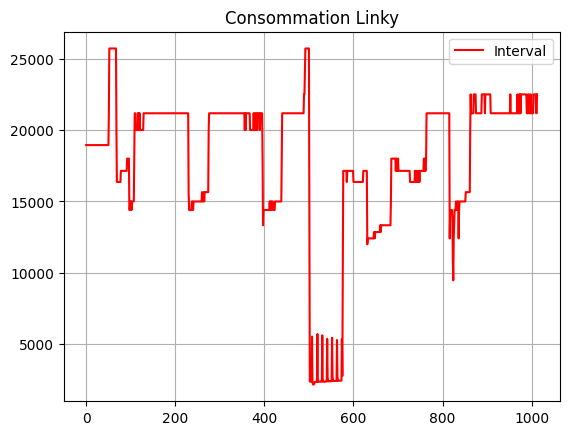

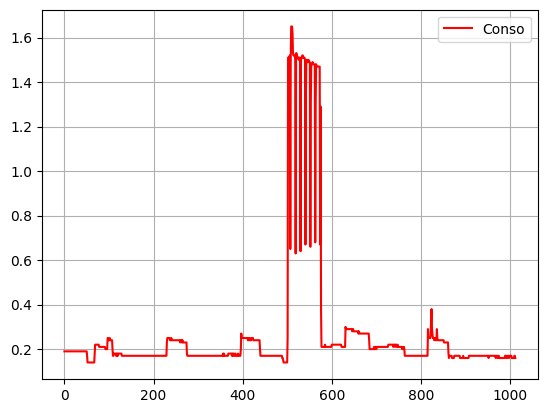

In [7]:

plt.title('Consommation Linky')
plt.plot(data['interval'], color='red',label='Interval')
plt.grid()
plt.legend()
plt.show()
plt.plot(data['Conso'], color='red',label='Conso')
plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [8]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [9]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187609 entries, 0 to 187608
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Interval  187609 non-null  int64  
 1   kWh       187609 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.9 MB


In [10]:
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
187604,26938,0.13
187605,27452,0.13
187606,26543,0.14
187607,26936,0.13


In [11]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
187604,26938,0.13
187605,27452,0.13
187606,26543,0.14
187607,26936,0.13


<Axes: >

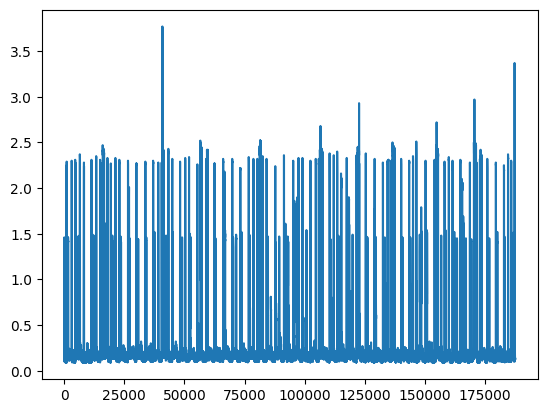

In [12]:
conso_data['kWh'].plot()

In [13]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
187604,26938,0.13,26.938,133.640211,4461126995
187605,27452,0.13,27.452,131.137986,4461154447
187606,26543,0.14,26.543,135.628979,4461180990
187607,26936,0.13,26.936,133.650134,4461207926


In [14]:
# index dernier echantillon
l=len(conso_data)-1
l

187608

In [15]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

4461235063000

In [16]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 1, 50, 59, 657439)

In [17]:
old

False

In [18]:
if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)

conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187609 entries, 0 to 187608
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Interval   187609 non-null  int64         
 1   kWh        187609 non-null  float64       
 2   sec        187609 non-null  float64       
 3   Wh         187609 non-null  float64       
 4   cumul(ms)  187609 non-null  int64         
 5   dates      187609 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 8.6 MB


In [19]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:51:25.946439,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:51:52.189439,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:52:18.074439,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:52:43.828439,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:53:09.602439,07/03/2024
...,...,...,...,...,...,...,...
187604,26938,0.13,26.938,133.640211,4461126995,2024-04-27 17:03:06.652439,27/04/2024
187605,27452,0.13,27.452,131.137986,4461154447,2024-04-27 17:03:34.104439,27/04/2024
187606,26543,0.14,26.543,135.628979,4461180990,2024-04-27 17:04:00.647439,27/04/2024
187607,26936,0.13,26.936,133.650134,4461207926,2024-04-27 17:04:27.583439,27/04/2024


In [20]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 01:51:25.946439   
 
          days  
 0  07/03/2024  ,
         Interval   kWh     sec          Wh   cumul(ms)  \
 187608     27137  0.13  27.137  132.660206  4461235063   
 
                             dates        days  
 187608 2024-04-27 17:04:54.720439  27/04/2024  )

In [21]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day, month, year

('27/04/2024', 4, 2024)

In [22]:
conso_data;

In [23]:
day

'27/04/2024'

In [24]:
conso_data[conso_data['days']==day]

,Interval,kWh,sec,Wh,cumul(ms),dates,days
184963,34119,0.10,34.119,105.513057,4399744095,2024-04-27 00:00:03.752439,27/04/2024
184964,31973,0.11,31.973,112.595002,4399776068,2024-04-27 00:00:35.725439,27/04/2024
184965,32664,0.11,32.664,110.213079,4399808732,2024-04-27 00:01:08.389439,27/04/2024
184966,34095,0.10,34.095,105.587330,4399842827,2024-04-27 00:01:42.484439,27/04/2024
184967,33683,0.11,33.683,106.878841,4399876510,2024-04-27 00:02:16.167439,27/04/2024
...,...,...,...,...,...,...,...
187604,26938,0.13,26.938,133.640211,4461126995,2024-04-27 17:03:06.652439,27/04/2024
187605,27452,0.13,27.452,131.137986,4461154447,2024-04-27 17:03:34.104439,27/04/2024
187606,26543,0.14,26.543,135.628979,4461180990,2024-04-27 17:04:00.647439,27/04/2024
187607,26936,0.13,26.936,133.650134,4461207926,2024-04-27 17:04:27.583439,27/04/2024


In [25]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
grouped


In [26]:
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000
df_grp


,kWh
days,
07/03/2024,3.133
08/03/2024,3.752
09/03/2024,3.081
10/03/2024,3.534
11/03/2024,4.540
12/03/2024,3.558
13/03/2024,3.541
14/03/2024,3.653
15/03/2024,3.563


In [27]:
# mean by day from 07/03
mean=(grouped.count()/1000).mean()
mean

kWh    3.607865
dtype: float64

In [28]:

# save to file
filename='conso_par_jour.csv'
df_grp.to_csv(filename)
filename='../conso_par_jour.csv'
df_grp.to_csv(filename)

In [29]:
data = list(df_grp['kWh'])
print(data)

import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

[3.133, 3.752, 3.081, 3.534, 4.54, 3.558, 3.541, 3.653, 3.563, 3.36, 3.349, 4.402, 3.508, 3.441, 3.551, 3.744, 3.527, 3.337, 3.892, 3.418, 3.474, 3.638, 3.756, 3.653, 3.831, 3.837, 3.818, 3.42, 3.476, 4.418, 3.401, 4.073, 3.78, 4.06, 3.433, 3.579, 3.443, 4.116, 3.272, 3.319, 3.702, 3.688, 4.22, 3.284, 3.379, 3.767, 4.092, 3.497, 3.301, 3.292, 3.06, 2.646]


In [30]:
#manuel
#day = '11/03/2024'
day

'27/04/2024'

In [31]:
# conso of the day
conso_day = conso_data[conso_data['days']==day]
len(conso_day)

2646

In [32]:
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [33]:
conso_day.head(1).dates, conso_day.tail(1).dates


(184963   2024-04-27 00:00:03.752439
 Name: dates, dtype: datetime64[ns],
 187608   2024-04-27 17:04:54.720439
 Name: dates, dtype: datetime64[ns])

In [34]:
conso_day.loc[:,'dates']

184963   2024-04-27 00:00:03.752439
184964   2024-04-27 00:00:35.725439
184965   2024-04-27 00:01:08.389439
184966   2024-04-27 00:01:42.484439
184967   2024-04-27 00:02:16.167439
                    ...            
187604   2024-04-27 17:03:06.652439
187605   2024-04-27 17:03:34.104439
187606   2024-04-27 17:04:00.647439
187607   2024-04-27 17:04:27.583439
187608   2024-04-27 17:04:54.720439
Name: dates, Length: 2646, dtype: datetime64[ns]

In [35]:
# dataframe with hour index
conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df

C:\Users\jean\AppData\Local\Temp\ipykernel_7832\1509504731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:3,34119,0.10,34.119,105.513057,4399744095,2024-04-27 00:00:03.752439,27/04/2024
0:0:35,31973,0.11,31.973,112.595002,4399776068,2024-04-27 00:00:35.725439,27/04/2024
0:1:8,32664,0.11,32.664,110.213079,4399808732,2024-04-27 00:01:08.389439,27/04/2024
0:1:42,34095,0.10,34.095,105.587330,4399842827,2024-04-27 00:01:42.484439,27/04/2024
0:2:16,33683,0.11,33.683,106.878841,4399876510,2024-04-27 00:02:16.167439,27/04/2024
...,...,...,...,...,...,...,...
17:3:6,26938,0.13,26.938,133.640211,4461126995,2024-04-27 17:03:06.652439,27/04/2024
17:3:34,27452,0.13,27.452,131.137986,4461154447,2024-04-27 17:03:34.104439,27/04/2024
17:4:0,26543,0.14,26.543,135.628979,4461180990,2024-04-27 17:04:00.647439,27/04/2024


In [36]:
here = now.strftime('%H:%M:%S')
here, len(df)/1000

('17:04:59', 2.646)

In [37]:
conso_jour=len(df['kWh'])
conso_jour

2646

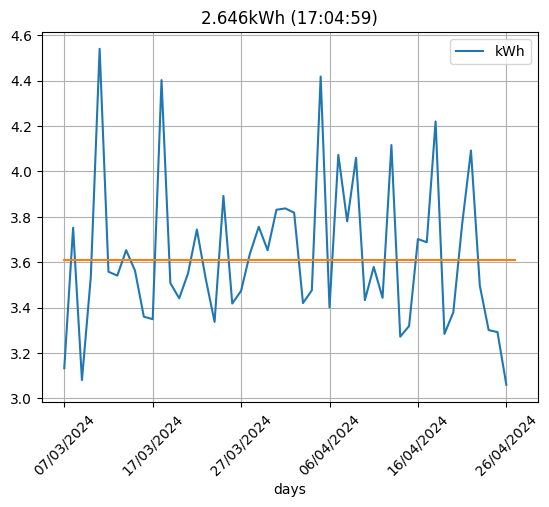

In [38]:
df_grp.iloc[:-1].plot()#kind='bar')
plt.plot((0,len(df_grp)-1),(mean,mean))
plt.title(str(len(df)/1000)+'kWh ('+str(here)+')')
plt.xticks(rotation=45)
plt.grid()


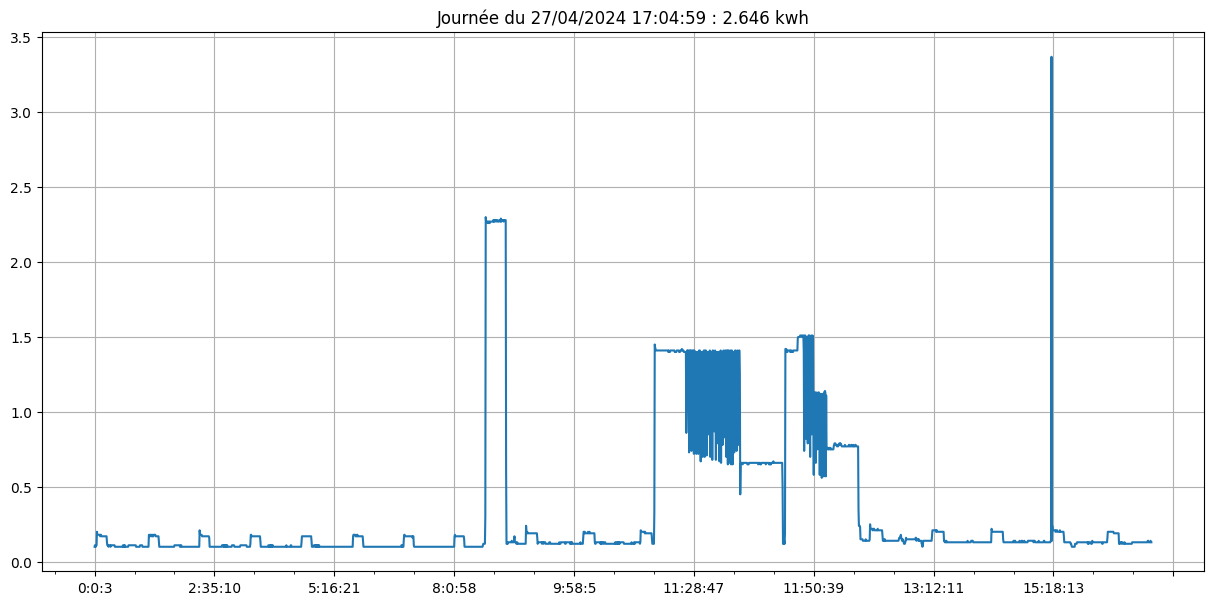

In [39]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
plt.grid()

In [84]:
df['power']=[y for x,y in zip(df['Interval'],df['kWh'])]
df['power'].tail(100)

heure
16:21:17    0.20
16:21:36    0.20
16:21:54    0.20
16:22:12    0.20
16:22:31    0.20
            ... 
17:3:6      0.13
17:3:34     0.13
17:4:0      0.14
17:4:27     0.13
17:4:54     0.13
Name: power, Length: 100, dtype: float64

<Axes: xlabel='heure'>

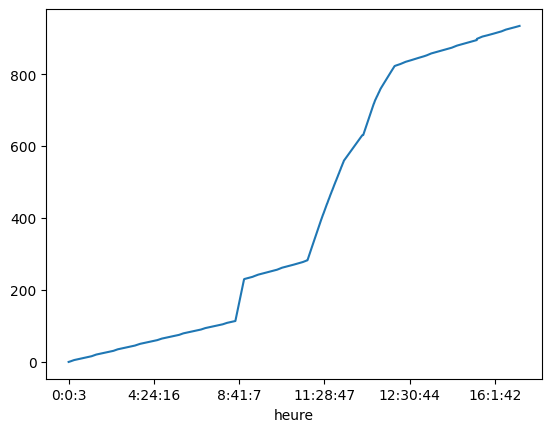

In [41]:
evo=df['power'].cumsum()
evo.plot()

555

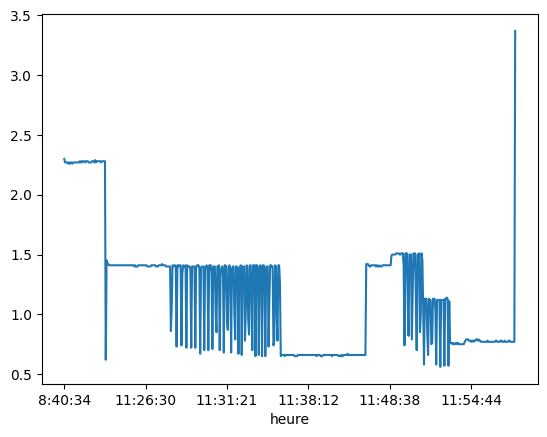

In [42]:
# bouilloire, microondes, four
filter=(.5<df['kWh'])
pic_high = df[filter]
pic_high['kWh'].plot()
len(pic_high)

1434

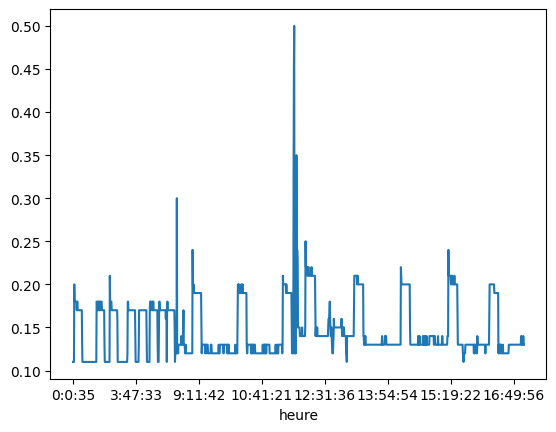

In [43]:
# frigo, moteur volet
pic_middle = df[(0.1<df['kWh']) & (df['kWh']<=.5)]
pic_middle['kWh'].plot()
len(pic_middle) # wh

2091

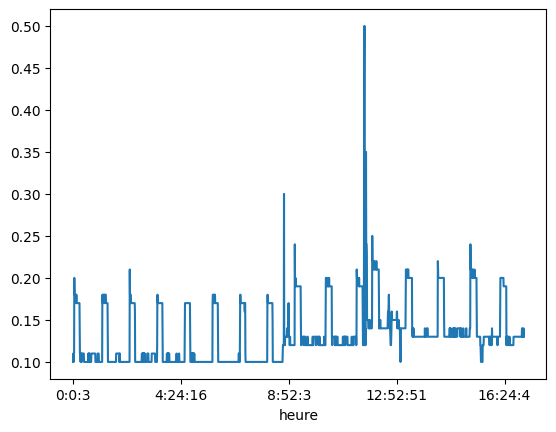

In [44]:
# pics frigo par jour
filter = (df['kWh']<=0.5)
pic_low = df[filter]
pic_low['kWh'].plot()
len(pic_low) # wh

In [45]:
time = conso_data['dates']
#time


In [46]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [47]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [48]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

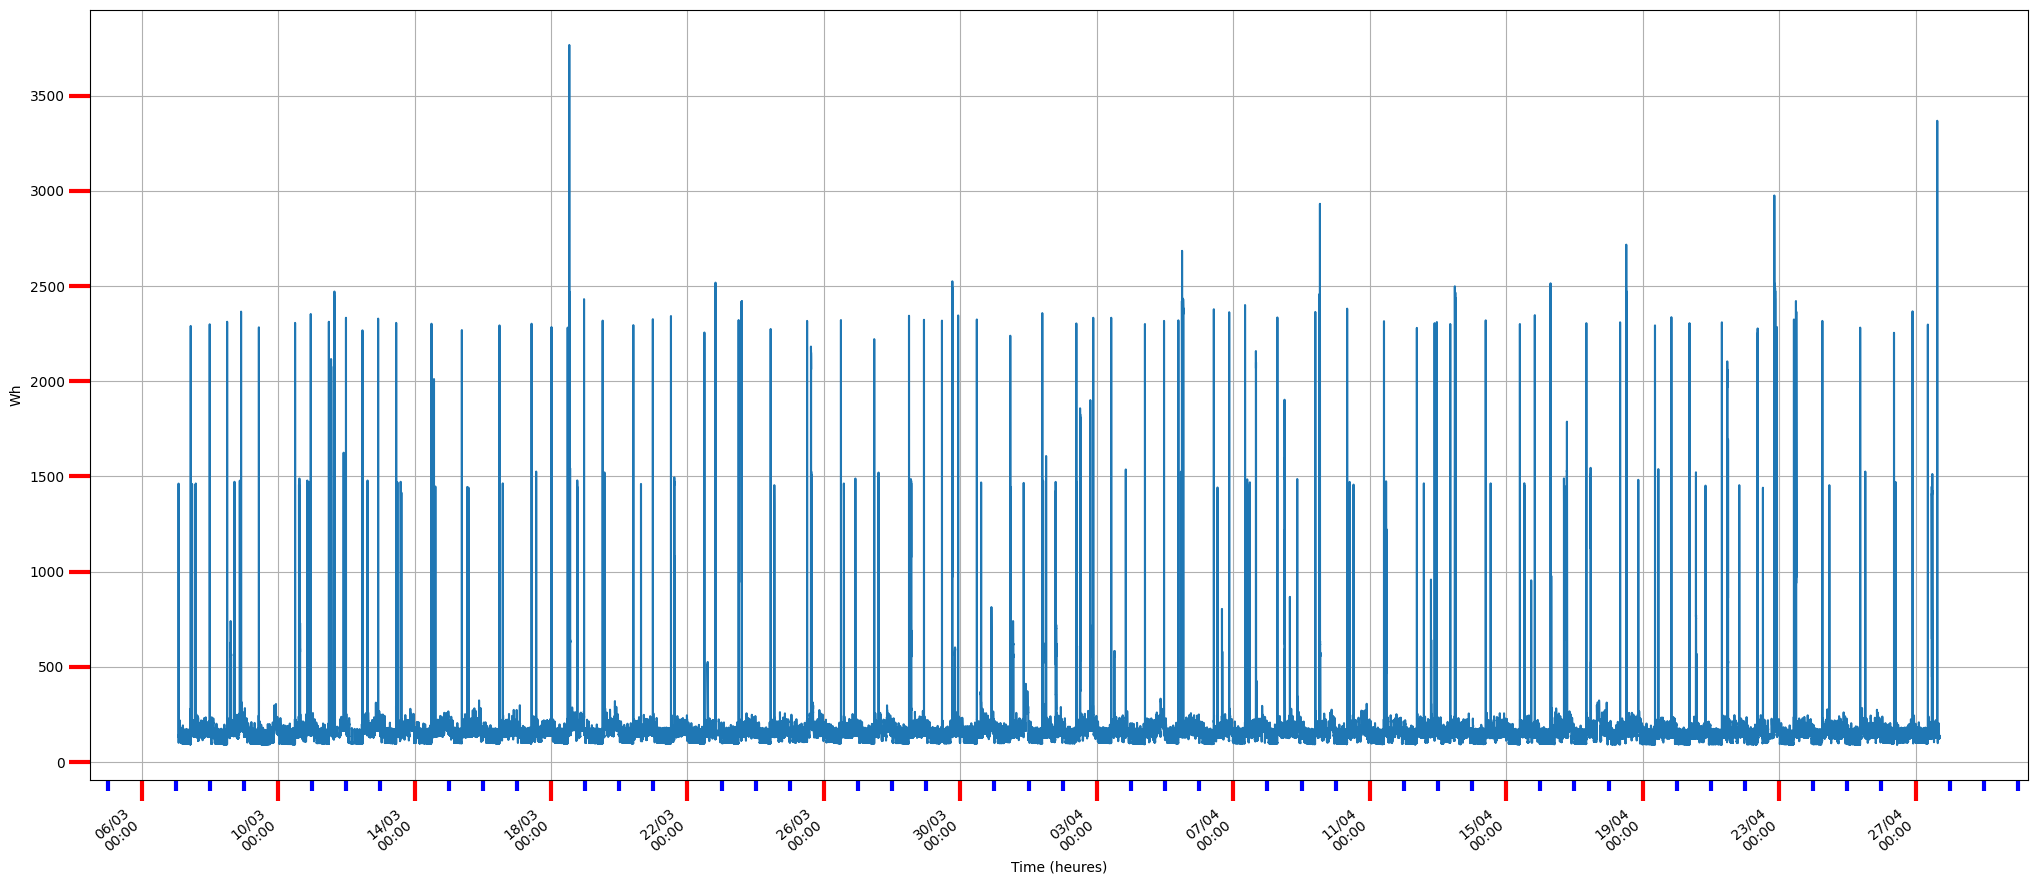

In [49]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [50]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
187608,27137,0.13,27.137,132.660206,4461235063,2024-04-27 17:04:54.720439,27/04/2024


In [51]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

4461235063000

# Slice of last 1 kWh

In [52]:
l = len(conso_data)  # total watt consommés
l

187609

In [53]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(187609, 1000)

In [54]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [55]:
data = conso_data.tail(taille)
len(data),data

(1000,
         Interval   kWh     sec          Wh   cumul(ms)  \
 186609      5462  0.66   5.462  659.099231  4441605423   
 186610      5465  0.66   5.465  658.737420  4441610888   
 186611      5465  0.66   5.465  658.737420  4441616353   
 186612      5468  0.66   5.468  658.376006  4441621821   
 186613      5477  0.66   5.477  657.294139  4441627298   
 ...          ...   ...     ...         ...         ...   
 187604     26938  0.13  26.938  133.640211  4461126995   
 187605     27452  0.13  27.452  131.137986  4461154447   
 187606     26543  0.14  26.543  135.628979  4461180990   
 187607     26936  0.13  26.936  133.650134  4461207926   
 187608     27137  0.13  27.137  132.660206  4461235063   
 
                             dates        days  
 186609 2024-04-27 11:37:45.080439  27/04/2024  
 186610 2024-04-27 11:37:50.545439  27/04/2024  
 186611 2024-04-27 11:37:56.010439  27/04/2024  
 186612 2024-04-27 11:38:01.478439  27/04/2024  
 186613 2024-04-27 11:38:06.955439  27

In [56]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [57]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [58]:
cumtime_end,cumtime_start

(4461235063000, 4441610888000)

In [59]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

19624175000

In [60]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 4, 27, 17, 5, 9, 485391),
 datetime.datetime(2024, 4, 27, 11, 38, 5, 310391),
 '27/04/2024 17:04:54')

In [61]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:51:25.946439,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:51:52.189439,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:52:18.074439,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:52:43.828439,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:53:09.602439,07/03/2024
...,...,...,...,...,...,...,...
187604,26938,0.13,26.938,133.640211,4461126995,2024-04-27 17:03:06.652439,27/04/2024
187605,27452,0.13,27.452,131.137986,4461154447,2024-04-27 17:03:34.104439,27/04/2024
187606,26543,0.14,26.543,135.628979,4461180990,2024-04-27 17:04:00.647439,27/04/2024
187607,26936,0.13,26.936,133.650134,4461207926,2024-04-27 17:04:27.583439,27/04/2024


In [62]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('27/04/2024 11:37:50', '27/04/2024 17:04:54')

In [63]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-04-27 11:37:45.080439', '2024-04-27 17:04:54.720439')

In [64]:
k

1

In [65]:
data.Interval.tail(1000)

186609     5462
186610     5465
186611     5465
186612     5468
186613     5477
          ...  
187604    26938
187605    27452
187606    26543
187607    26936
187608    27137
Name: Interval, Length: 1000, dtype: int64

In [66]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(5.454195, 4.400282718164642, 5, 27, 15)

In [67]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_7832\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [68]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
186609,5462,0.66,5.462,659.099231,4441605423,2024-04-27 11:37:45.080439,27/04/2024,2024-04-27 11:37:45.080439
186610,5465,0.66,5.465,658.737420,4441610888,2024-04-27 11:37:50.545439,27/04/2024,2024-04-27 11:37:50.545439
186611,5465,0.66,5.465,658.737420,4441616353,2024-04-27 11:37:56.010439,27/04/2024,2024-04-27 11:37:56.010439
186612,5468,0.66,5.468,658.376006,4441621821,2024-04-27 11:38:01.478439,27/04/2024,2024-04-27 11:38:01.478439
186613,5477,0.66,5.477,657.294139,4441627298,2024-04-27 11:38:06.955439,27/04/2024,2024-04-27 11:38:06.955439
...,...,...,...,...,...,...,...,...
187604,26938,0.13,26.938,133.640211,4461126995,2024-04-27 17:03:06.652439,27/04/2024,2024-04-27 17:03:06.652439
187605,27452,0.13,27.452,131.137986,4461154447,2024-04-27 17:03:34.104439,27/04/2024,2024-04-27 17:03:34.104439
187606,26543,0.14,26.543,135.628979,4461180990,2024-04-27 17:04:00.647439,27/04/2024,2024-04-27 17:04:00.647439
187607,26936,0.13,26.936,133.650134,4461207926,2024-04-27 17:04:27.583439,27/04/2024,2024-04-27 17:04:27.583439


<Axes: >

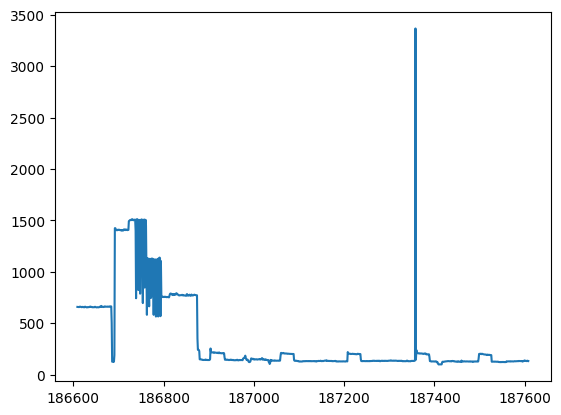

In [69]:
#data.tail(600)['Wh'].plot()
data['Wh'].plot()

In [70]:
data['Wh']

186609    659.099231
186610    658.737420
186611    658.737420
186612    658.376006
186613    657.294139
             ...    
187604    133.640211
187605    131.137986
187606    135.628979
187607    133.650134
187608    132.660206
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

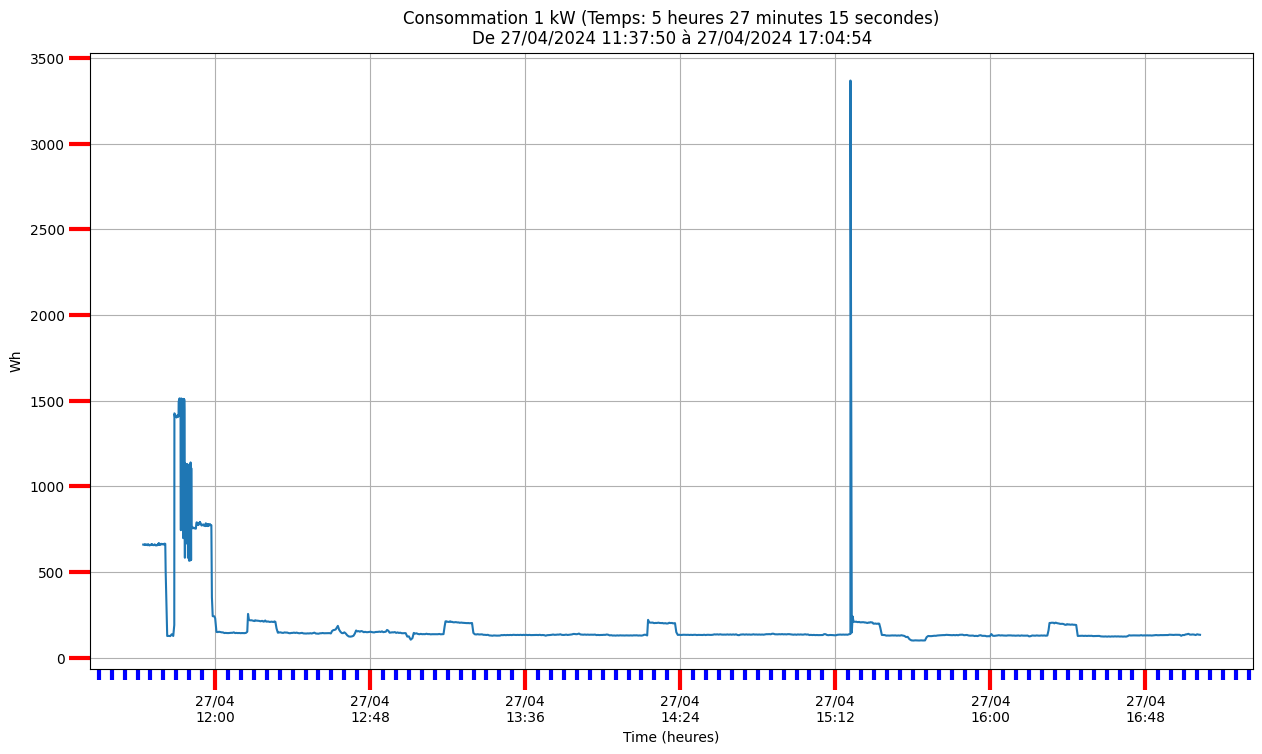

In [71]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 8)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

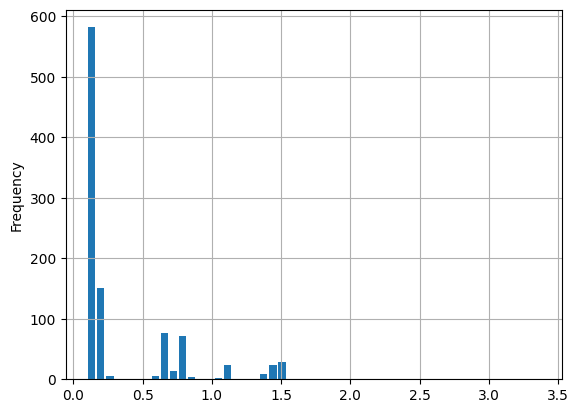

In [72]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [73]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
187604,26938,0.13,26.938,133.640211,4461126995,2024-04-27 17:03:06.652439,27/04/2024
187605,27452,0.13,27.452,131.137986,4461154447,2024-04-27 17:03:34.104439,27/04/2024
187606,26543,0.14,26.543,135.628979,4461180990,2024-04-27 17:04:00.647439,27/04/2024
187607,26936,0.13,26.936,133.650134,4461207926,2024-04-27 17:04:27.583439,27/04/2024
187608,27137,0.13,27.137,132.660206,4461235063,2024-04-27 17:04:54.720439,27/04/2024


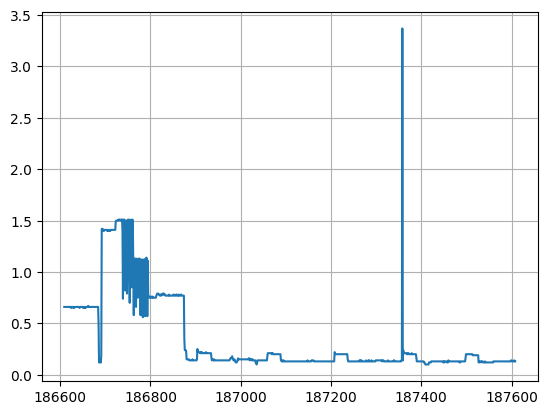

In [74]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [75]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(4461235063000.0, 74353.91771666666)

In [76]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 4, 27, 17, 5, 14, 978222),
 datetime.datetime(2024, 3, 7, 1, 51, 19, 915222))

In [77]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(187609, 4461236, 1239.2322222222222)

In [78]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [79]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [80]:
732/12 # 60 jours

61.0

In [81]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

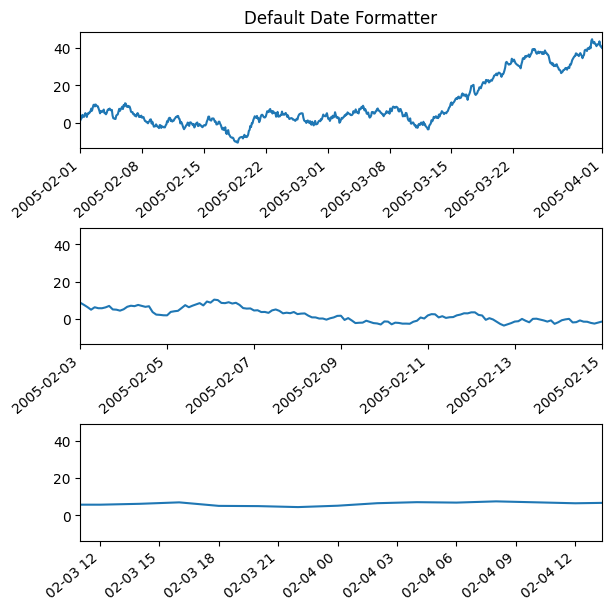

In [82]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [83]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)